# Exercise 3

In this script we will go over a Python solution to Andrew Ng's intro to ML on Coursera. Please refer to the [exercises](https://github.com/jensenna/intro-ml-python/tree/master/Exercises) to see the questions and follow along.

In this Exercise we'll implement a Multi-Class Classification logistic regression. This will be used to recognize hand-written digits (0-9).

In [232]:
from __future__ import division

In [233]:
import numpy as np
from scipy.optimize import minimize
import scipy.io # used to load matlab-formatted .m files.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import bqplot as bq # bqlot and IPython.display are used to create an interactive plot in the final section below
from IPython.display import display 
from sklearn.linear_model import LogisticRegression # used following the first section of the notebook

In [234]:
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("notebook")

In [235]:
def sns_reset(): 
    """Call this function to toggle back to the sns plotting environment from the matplotlib environment."""
    sns.reset_defaults()
    sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("notebook")

    
    
    
    
    
# Call these three functions at the top of the notebook to allow toggling between sns and matplotlib 
# environments while maintaining a uniform plot style throughout.
sns.reset_orig() 
sns_reset()
plt.ion()

In [236]:
data_dict = scipy.io.loadmat('data/ex3data1.mat')

In [237]:
data_dict['X'].shape, data_dict['y'].shape

((5000, 400), (5000, 1))

In [238]:
X = data_dict['X']
y = data_dict['y']
M = X.shape[0]
N = X.shape[1]

num_labels = len(np.unique((y)))

Adding a column of 1s to represent the intercept, just like the other exercises

In [239]:
X = np.hstack((np.ones((M, 1)), X))

Ok, the data is loaded. The images are represented in matrix X as a 400 dimensional vector. There are 5000 images. Each column is the greyscale value of one of the handwriting digits in the 20x20 pixel image.

In [240]:
"""Python version of sigmoid.m."""
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Multi-class classification

## Visualizing the data

In [241]:
dim = 10

examples = X[:, 1:][np.random.randint(M, size=dim * dim)]

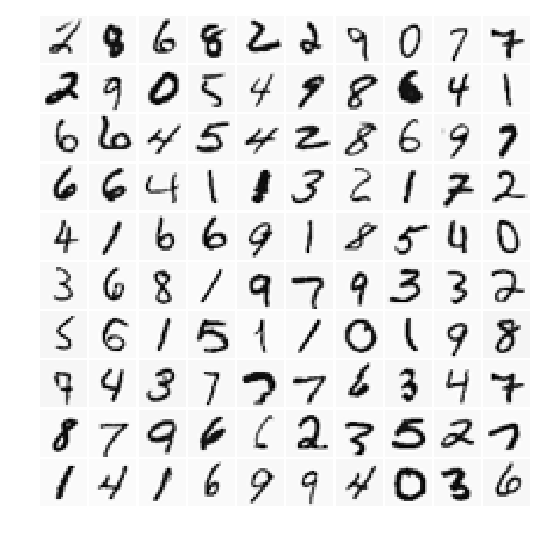

In [242]:

"""Python version of displayData.m."""
fig = plt.figure(figsize=(5, 5))

gs = gridspec.GridSpec(dim, dim)
gs.update(bottom=0.01, top=0.99, left=0.01, right=0.99, 
          hspace=0.05, wspace=0.05)

k = 0
for i in range(dim):
    for j in range(dim):
        ax = plt.subplot(gs[i, j])
        ax.axis('off')
        ax.imshow(examples[k].reshape(int(np.sqrt(N)), int(np.sqrt(N))).T,
            cmap=plt.get_cmap('Greys'), interpolation='nearest')
        k += 1
        
# plt.savefig('ex3_plots/fig_1.png', dpi=300)

## One-vs-all classification

One way we could think of this problem is as such: is the number a 1? If yes, classify it as a 1, if no, ask is the number a 2, etc.

Let's initialize that model's parameters. Note that we are creating a new response, y_1_hot, to code the 1 vs other variable.

In [243]:
y_1_hot = (y == 1).astype('float')

In [244]:
lam = 1.

In [245]:
theta_0 = np.zeros(N + 1)

Remember the cost function from regularized (ridge) logistic regression? Here it is again. This time, let's use a method that allows us to 'remember' the cost gradient as it descends to the minimum.

In [246]:
cost_history = [] #an array for storing the gradients/costs

def cost_function(theta, X, y, M, lam):
    """Python version of lrCostFunction.m."""
    global cost_history
    
    cost = 1 / M * np.sum(-y * (np.log(sigmoid(theta.dot(X.T)))) - ((1 - y) * (np.log(1 - sigmoid(theta.dot(X.T))).T))) \
        + lam / 2 / M * np.sum(theta[1:]**2)
    grad = 1 / M * (sigmoid(theta.dot(X.T)) - y).dot(X) + lam / M * np.hstack(([0], theta[1:]))
    
    cost_history.append(cost)
    return cost

In [247]:
def gradient(theta, X, y, M, lam):
    """Python version of gradient descent"""
    grad = (1 / M) * (sigmoid(theta.dot(X.T)) - y).dot(X) + lam / M * np.hstack(([0],theta[1:]))
    return grad

In [248]:
theta = theta_0

1 / M * (np.sum(-y * (np.log(sigmoid(theta.dot(X.T))))) - np.sum((1 - y) * (np.log(1 - sigmoid(theta.dot(X.T))).T)))

-85257.103208881

In [250]:
cost_history = [] # Use this array to log costs calculated in the call to scipy's "minimize" below.

def cost_function(theta, X, y, M, lam):
    """Python version of lrCostFunction.m."""
    global cost_history
    
    cost = 1 / M * (- y.dot(np.log(sigmoid(theta.dot(X.T)))) - (1 - y).dot(np.log(1 - sigmoid(theta.dot(X.T))))) \
        + lam / 2 / M * np.sum(theta[1:]**2)
    grad = 1 / M * (sigmoid(theta.dot(X.T)) - y).dot(X) + lam / M * np.hstack(([0], theta[1:]))
    
    cost_history.append(cost)
    return cost, grad

In [252]:

cost_0, _ = cost_function(theta_0, X, y, M, lam)

print('Cost at initial theta (zeros): %.3f' % cost_0)

ValueError: shapes (5000,1) and (5000,) not aligned: 1 (dim 1) != 5000 (dim 0)

Running the optimization with scipy's "minimize"

In [249]:
cost_0 = cost_function(theta_0, X, y, M, lam)

print('Cost at initial theta (zeros): %.3f' % cost_0)

Cost at initial theta (zeros): -85257.103


In [146]:
# cost_history = []

# """This call to scipy's "minimize" is a Python version of the Octave call to "fminunc".""" 
# res = minimize(cost_function, theta_0, method='L-BFGS-B', args=(X, y_1_hot, M, lam), jac=True)

In [147]:
import scipy.optimize as opt

cost_history = []
opt.fmin_tnc(func=cost_function, x0=theta_0, fprime=gradient, args=(X, y, M, lam))

ValueError: tnc: invalid gradient vector from minimized function.

In [123]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op